In [2]:
import pandas as pd
sarcasm_headlines = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
sarcasm_headlines

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [3]:
del sarcasm_headlines['article_link']
print("Sarcasm News Headlines - Null:\n",sarcasm_headlines.isnull().sum())
print("\nSarcasm News Headlines - Duplicates:",sarcasm_headlines.duplicated().sum())
print("Shape of Sarcasm News Headlines:",sarcasm_headlines.shape)
print("\nSarcasm News Headlines Categories:\n",sarcasm_headlines['is_sarcastic'].value_counts())

Sarcasm News Headlines - Null:
 headline        0
is_sarcastic    0
dtype: int64

Sarcasm News Headlines - Duplicates: 107
Shape of Sarcasm News Headlines: (26709, 2)

Sarcasm News Headlines Categories:
 is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


In [4]:
import warnings as warnings
warnings.filterwarnings('ignore')

Shape of Sarcasm News Headlines without Duplicates: (26602, 2)


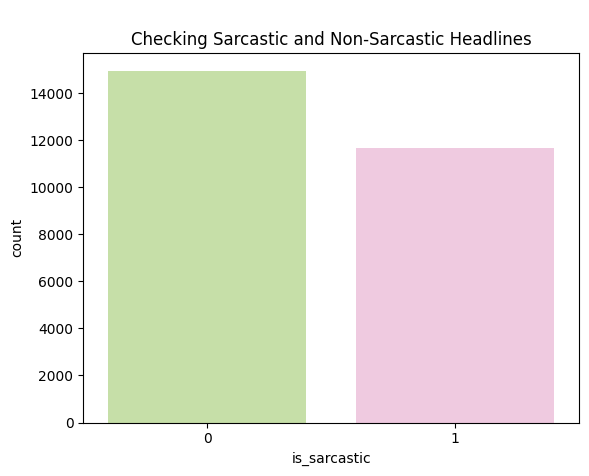

In [5]:
sarcasm_headlines = sarcasm_headlines.drop_duplicates()
print("Shape of Sarcasm News Headlines without Duplicates:",sarcasm_headlines.shape)

import matplotlib.pyplot as plt
import seaborn as sns

#sarcasm_headlinesPLT.figure(figsize=(12, 5))
plt.title('\nChecking Sarcastic and Non-Sarcastic Headlines')
sns.countplot(x = 'is_sarcastic', data = sarcasm_headlines, palette = 'PiYG_r')
plt.show()

In [6]:
import re as re
import nltk as nltk
from nltk.corpus import stopwords as stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')

def preprocessHead(sarc):
    sarc = re.sub(r'[^a-zA-Z]', ' ', sarc)
    sarc = sarc.lower()
    sarctokens = word_tokenize(sarc)
    sarctokens = [sar for sar in sarctokens if sar not in stopwords.words('english')]
    return ' '.join(sarctokens)

sarcasm_headlines['Cleaned_Headlines'] = sarcasm_headlines['headline'].apply(preprocessHead)
sarcasm_headlines

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,headline,is_sarcastic,Cleaned_Headlines
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...
2,mom starting to fear son's web series closest ...,1,mom starting fear son web series closest thing...
3,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...
4,j.k. rowling wishes snape happy birthday in th...,0,j k rowling wishes snape happy birthday magica...
...,...,...,...
26704,american politics in moral free-fall,0,american politics moral free fall
26705,america's best 20 hikes,0,america best hikes
26706,reparations and obama,0,reparations obama
26707,israeli ban targeting boycott supporters raise...,0,israeli ban targeting boycott supporters raise...
